In [1]:
#Ë∑ØÂæÑÁÆ°ÁêÜ/ÂÖ®Â±ÄÂèòÈáè
import os
import sys

# ËÆæÁΩÆ‰∏∫È°πÁõÆÊ†πÁõÆÂΩïÔºàÂåÖÂê´ data, pipline Á≠âÊñá‰ª∂Â§πÁöÑÁõÆÂΩïÔºâ
project_root = os.path.abspath("..")
os.chdir(project_root)
sys.path.append(project_root)
from utils.config import KEYWORDS
from utils.path_helper import get_data_path

#Âü∫Á°ÄÊ®°Âùó
import numpy as np
import pandas as pd

#Ê∏ÖÊ¥óÂáΩÊï∞ÔºåÁâπÂæÅÂ∑•Á®ãÂáΩÊï∞ÂØºÂÖ•
from pipline.pipline import pipeline_house_data
from features_wlh.features_wlh import add_selected_features
#ÂØºÂÖ•ËÆ≠ÁªÉÂáΩÊï∞
from model.train_model import train_model
#ÈÄâÊã©ËÆ≠ÁªÉÂáΩÊï∞ÔºåËá™Â∑±ÂéªË∞ÉÊï¥
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
#ËÆ≠ÁªÉÈõÜÂàíÂàÜ(Â∑≤ÁªèÂú®train_modelÈáåÈù¢ÂÅöËøá,ÂØºÂÖ•Âè™ÊòØÂëäËØâ‰Ω†Â∑≤ÁªèÂÅöÂÆå‰∫Ü)
from sklearn.model_selection import train_test_split
#ÁâπÂæÅÈÄâÊã©
from features_wlh.feature_selector import feature_selection_by_k,select_final_top_features
#from features_wlh.feature_selector import make_advanced_features
#ÁâπÂæÅÂÄºÁõ∏ÂÖ≥ÊÄßÊ£ÄÈ™å
from features_wlh.feature_analysis import plot_feature_correlation
#ÂÖ±Á∫øÊÄßÊ£ÄÈ™å
from features_wlh.feature_vif_validation import check_multicollinearity
#ÁâπÂæÅÂÄºÈáçË¶ÅÊÄß‰∏éÁõÆÊ†áÊÄßÈÄâÊã©
from features_wlh.FeatureDeepAnalysis import FeatureDeepAnalysis
#ËØÑ‰º∞
from model.evaluate import evaluate_model
from advanced_modify.cross_validation import enhanced_cross_validate

Series of Preparation Before Training

d:\soft\Python\Python310\python.exe
Amount_cleanÂàÜÂ∏É


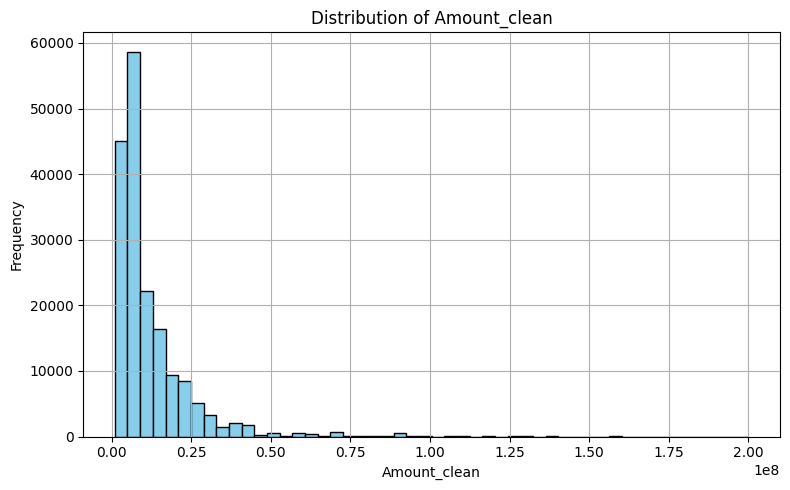

ÂØπÊï∞ÂåñÂêéÁöÑAmount_cleanÂàÜÂ∏É


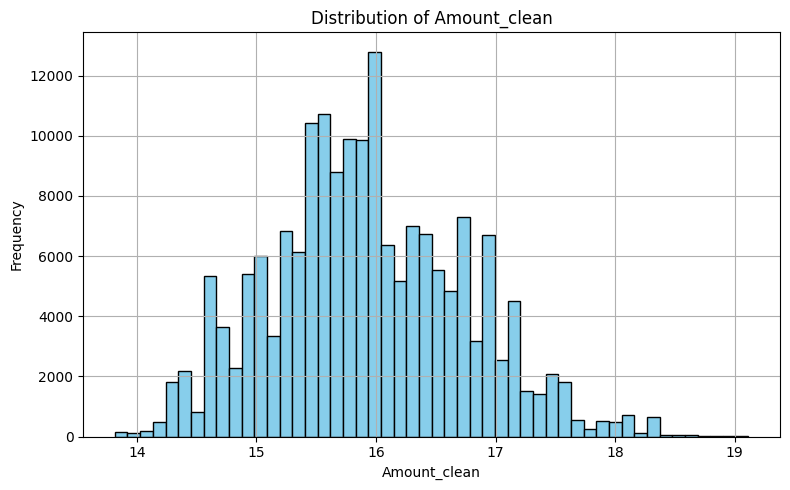

Ê∏ÖÊ¥óÂêéÁöÑÊï∞ÊçÆË°®ÁªìÊûÑ: (177572, 33)


In [2]:
##Ê£ÄÊü•Êìç‰ΩúË∑ØÂæÑ
import sys
print(sys.executable)
# Áõ¥Êé•ËØªÂèñÊï∞ÊçÆ
#df_cleaned = pd.read_csv(get_data_path("processed_data/house_prices_cleaned.csv"))
# Ê∏ÖÊ¥óÊï∞ÊçÆ
df = pd.read_csv(get_data_path("house_prices.csv"))
df_cleaned = pipeline_house_data(df, keywords=KEYWORDS)
print("Ê∏ÖÊ¥óÂêéÁöÑÊï∞ÊçÆË°®ÁªìÊûÑ:", df_cleaned.shape)

In [3]:
#Âº∫Âà∂ÈáçËΩΩ‰∏Ä‰∏ã
import importlib
import features_wlh.features_wlh
importlib.reload(features_wlh.features_wlh)  # Âº∫Âà∂ÈáçÊñ∞ËΩΩÂÖ•Ê®°Âùó
from features_wlh.features_wlh import add_selected_features, list_registered_features

In [ ]:
q99 = df_cleaned['Amount_clean'].quantile(0.99)
q1 = df_cleaned['Amount_clean'].quantile(0.01)
print(df_cleaned['Amount_clean'].describe())
print(q99)
print(q1)

17.989897843244528
14.285514812209815


Fundenmental Analysis

Analysis with picture and Visualization

Project  of Features and Validation

In [7]:
My_features = [
    "Car_Parking",
    "Bathroom",
    "Furnishing_giving",
    "Transaction_giving",
    "balcony_rank",
    "is_ground",
    "quality_score",
    "location_rank",
    "max_floor",
    "ownership_score",
    "relative_height",
    "society_level_hot", 
    "std_Carpet_Area",
    "facing_giving",
    "Status_giving",
    "is_multi_bathroom",
    "is_popular_location",
    "floor_area_combo",
    "location_comfort_combo",
    "floor_facing_score",
    "location_ownership_combo",
    "facing_height_combo",
    "area_furnishing_combo"
    ] #‰∏Ä‰∏™Á§∫‰æãÔºåËÆ≠ÁªÉÁöÑÊó∂ÂÄôÊ†πÊçÆÁâπÂæÅÂàÜÊûêËá™Â∑±ÂéªÈÄâ


#Ê∑ªÂä†Âπ∂Ê£ÄÊü•
df_cleaned_features = add_selected_features(df_cleaned, features_to_use = My_features)
print("ÂΩìÂâç df_cleaned_features ÁöÑÂàóÊúâÔºö", df_cleaned_features.columns.tolist())
missing = [feat for feat in My_features if feat not in df_cleaned_features.columns]
print("Áº∫Â§±ÁöÑÁâπÂæÅÔºö", missing)
df_cleaned_features.isnull().sum()
print("‚úÖ ÂΩìÂâçÊ≥®ÂÜåÁöÑÁâπÂæÅÂÄºÂáΩÊï∞ÊúâÔºö", list(list_registered_features()))
print("ÂΩìÂâçÁâπÂæÅÂÄºÊòØÂê¶‰∏∫Á©∫",df_cleaned_features[My_features].isnull().sum())
print("ÂΩìÂâçÁâπÂæÅÂÄºÊï∞ÂÄºÁ±ªÂûã",df_cleaned_features[My_features].dtypes)


ÂΩìÂâç df_cleaned_features ÁöÑÂàóÊúâÔºö ['Index', 'Price (in rupees)', 'Carpet Area', 'Status', 'Transaction', 'Furnishing', 'Balcony', 'is_prime_location', 'has_proximity', 'is_well_planned', 'is_new', 'is_resale', 'is_affordable', 'is_deal', 'is_spacious', 'is_luxury', 'is_gated', 'has_amenities', 'has_green_space', 'is_marketing_strong', 'location_encoded', 'floor_level', 'max_floor', 'is_ground', 'is_basement', 'relative_height', 'col_facing_score', 'col_overlooking_score', 'society_level', 'col_Bathroom_score', 'col_car_parking_score', 'ownership_score', 'Amount_clean', 'Car_Parking', 'Bathroom', 'Furnishing_giving', 'Transaction_giving', 'balcony_rank', 'quality_score', 'location_rank', 'location_level', 'society_level_hot', 'std_Carpet_Area', 'facing_giving', 'Status_giving', 'is_multi_bathroom', 'is_popular_location', 'floor_area_combo', 'location_comfort_combo', 'floor_facing_score', 'location_ownership_combo', 'facing_height_combo', 'area_furnishing_combo']
Áº∫Â§±ÁöÑÁâπÂæÅÔºö

Easy Chioce of your features

In [ ]:
print("ÊâìÂç∞df_cleanedË°®Â§¥")
print(df_cleaned_features.columns.tolist())
#Á≠õÈÄâÁâπÂæÅÂÄº
print("step1---Á≠õÈÄâÁâπÂæÅÂÄº")
# ÂàÜÊûêÊØè‰∏™ÁâπÂæÅÊï∞‰∏ãÁöÑÊúÄ‰ºòÁªÑÂêà
df_result = feature_selection_by_k(df_cleaned[My_features], target_col = df_cleaned["Amount_clean"], max_k=20, rank_features=10, model_cls = RandomForestRegressor)
print(df_result)
# Áõ¥Êé•ÈÄâÂá∫ÊúÄÁªàÊúÄÈáçË¶ÅÁöÑ15‰∏™ÁâπÂæÅ
top_features = select_final_top_features(df_cleaned[My_features], target_col = df_cleaned["Amount_clean"], max_k=20, top_k=15, model_cls = RandomForestRegressor)
for feature in top_features:
    print(feature)

ÊâìÂç∞df_cleanedË°®Â§¥
['Index', 'Price (in rupees)', 'Carpet Area', 'Status', 'Transaction', 'Furnishing', 'Balcony', 'is_prime_location', 'has_proximity', 'is_well_planned', 'is_new', 'is_resale', 'is_affordable', 'is_deal', 'is_spacious', 'is_luxury', 'is_gated', 'has_amenities', 'has_green_space', 'is_marketing_strong', 'location_encoded', 'floor_level', 'max_floor', 'is_ground', 'is_basement', 'relative_height', 'col_facing_score', 'col_overlooking_score', 'society_level', 'col_Bathroom_score', 'col_car_parking_score', 'ownership_score', 'Amount_clean', 'Car_Parking', 'Bathroom', 'Furnishing_giving', 'Transaction_giving', 'balcony_rank', 'quality_score', 'location_rank', 'location_level', 'society_level_hot', 'std_Carpet_Area', 'facing_giving', 'Status_giving', 'is_multi_bathroom', 'is_popular_location', 'floor_area_combo', 'location_comfort_combo', 'floor_facing_score', 'location_ownership_combo', 'facing_height_combo', 'area_furnishing_combo']
step1---Á≠õÈÄâÁâπÂæÅÂÄº
std_Carpet_

Check the Quality of Features

step2---ÁâπÂæÅÂêëÈáèÁõ∏ÂÖ≥ÊÄß


d:\soft\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


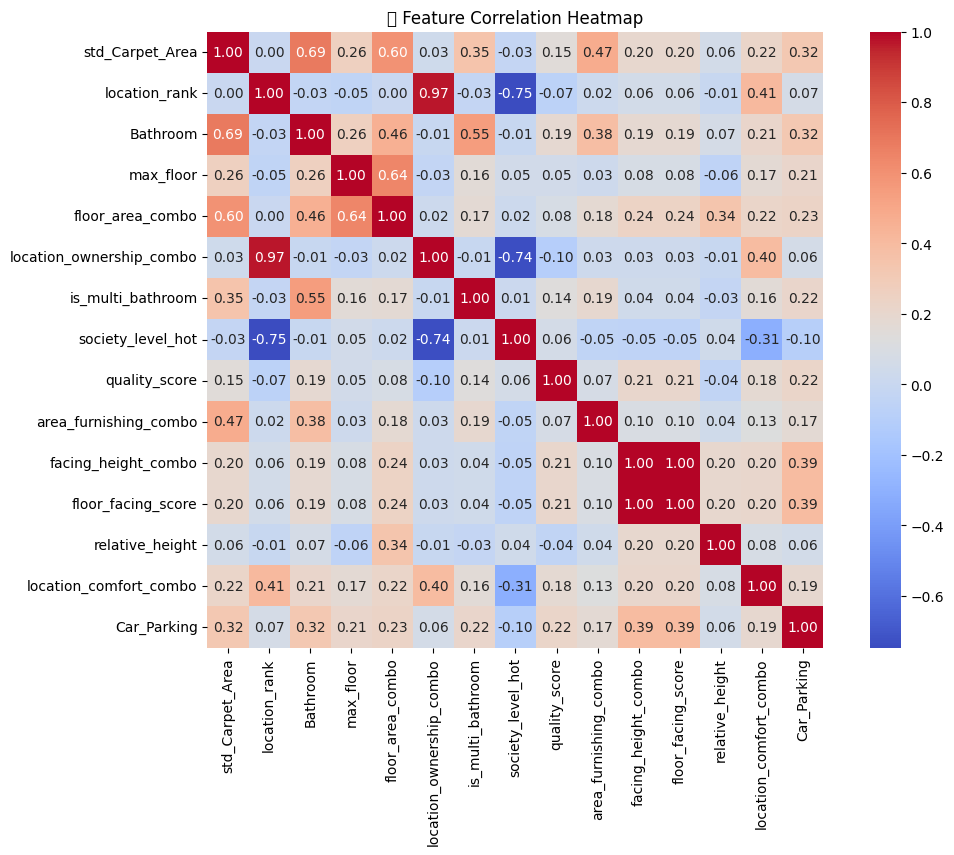

‚ö†Ô∏è È´òÂ∫¶Áõ∏ÂÖ≥ÁöÑÁâπÂæÅÂØπÔºà|Áõ∏ÂÖ≥ÊÄß| > 0.8)Ôºö
location_ownership_combo & location_rank ‚Üí Áõ∏ÂÖ≥Á≥ªÊï∞: 0.968
floor_facing_score & facing_height_combo ‚Üí Áõ∏ÂÖ≥Á≥ªÊï∞: 1.0
üîç Ê£ÄÊµãÂà∞ 2 ‰∏™È´òÁõ∏ÂÖ≥ÁâπÂæÅÂ∞ÜË¢´Âà†Èô§ÔºàÈòàÂÄºÔºö0.8ÔºâÔºö
['location_ownership_combo', 'floor_facing_score']
step3---VIFÊ£ÄÈ™å
üß™ ÊñπÂ∑ÆËÜ®ËÉÄÂõ†Â≠ê(VIF)Ê£ÄÊµãÁªìÊûú:
  feature        VIF
0   const  49.304772
step4---ÁâπÂæÅÂÄºÈáçË¶ÅÊÄßÊéíÂ∫è


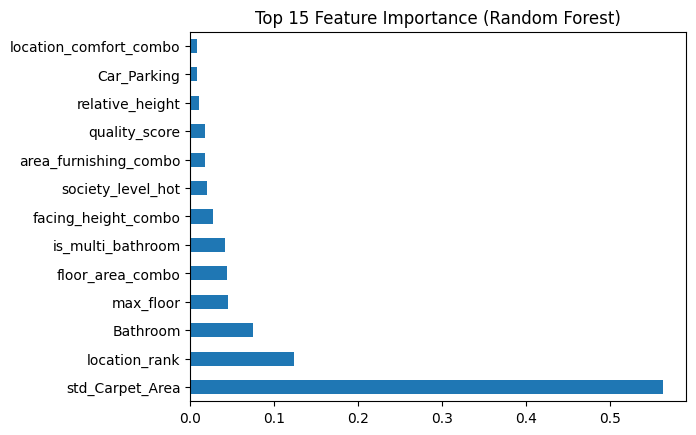

step5---ÁâπÂæÅÂÄºÁîªÂõæ


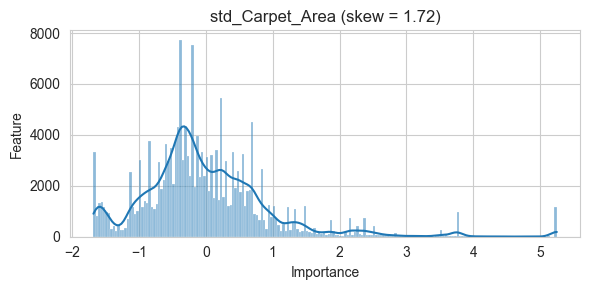

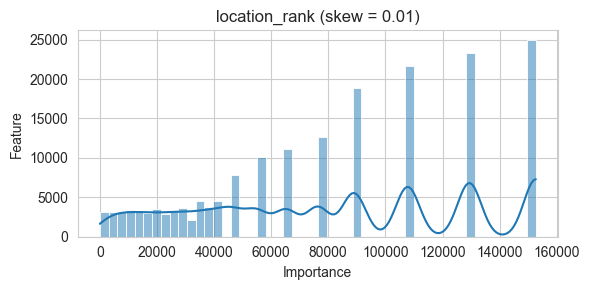

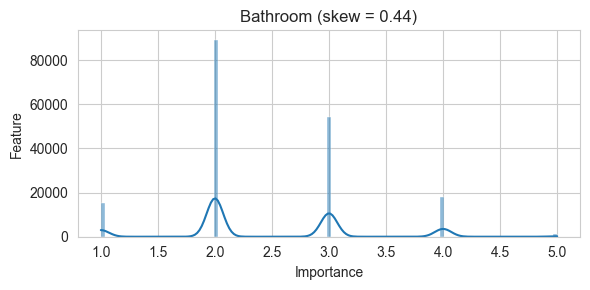

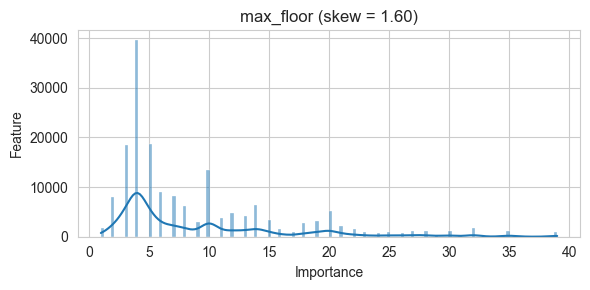

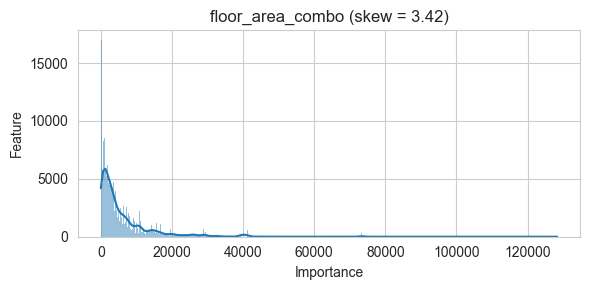

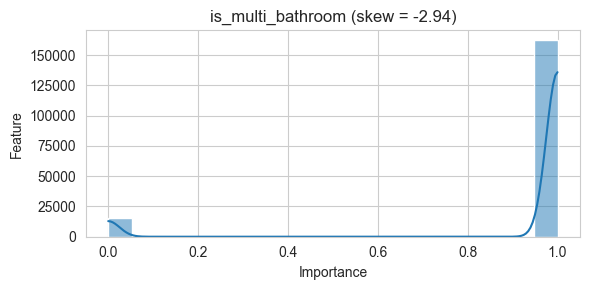

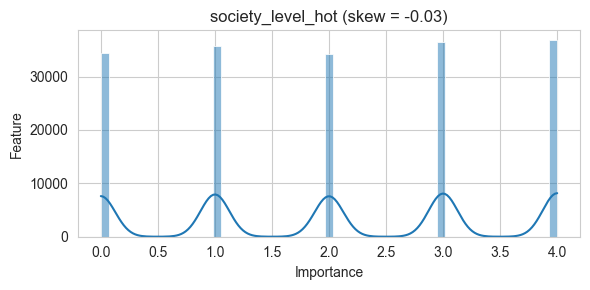

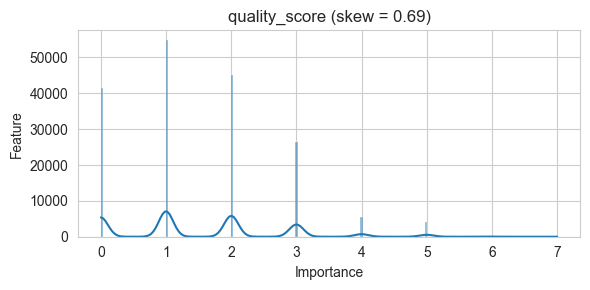

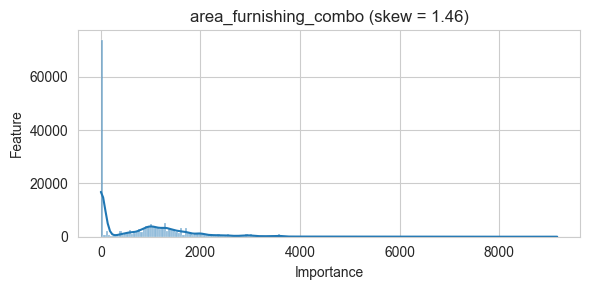

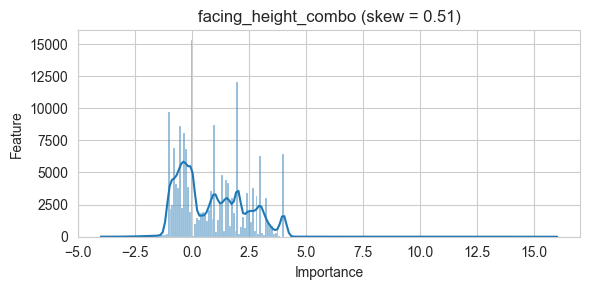

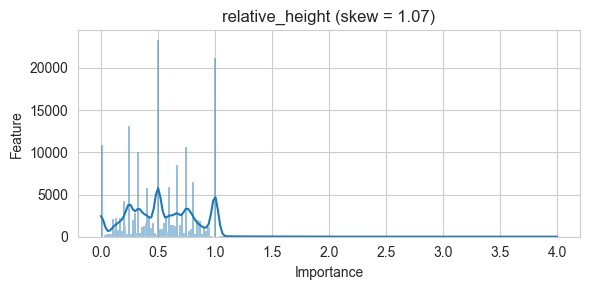

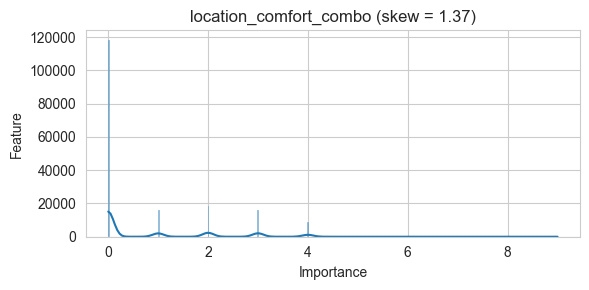

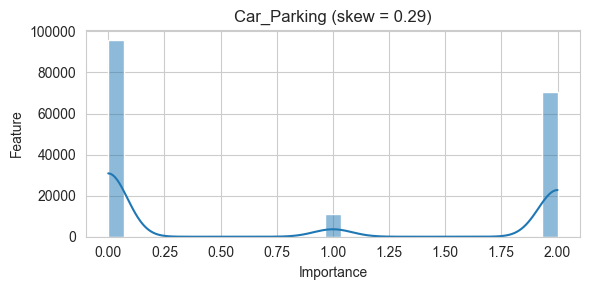

step6---ÁâπÂæÅÂÄºÂíåÁõÆÊ†áÂèòÈáèÁöÑÁõ∏ÂÖ≥ÊÄß


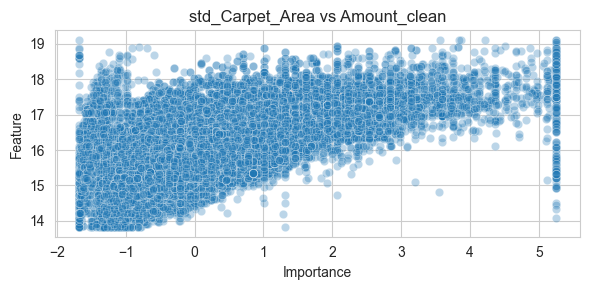

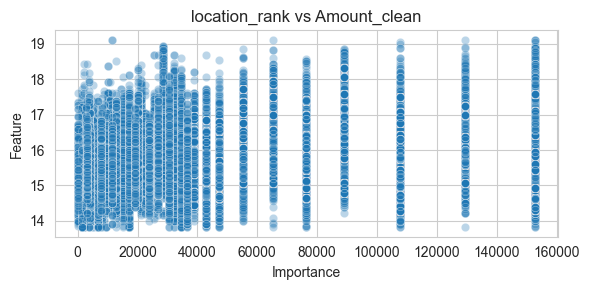

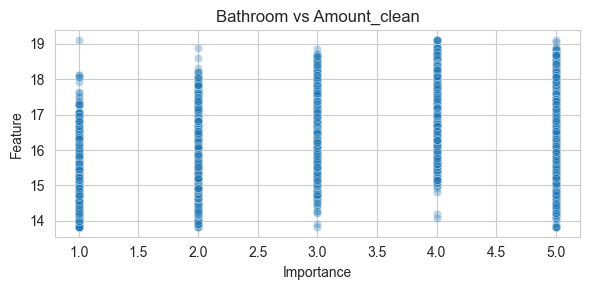

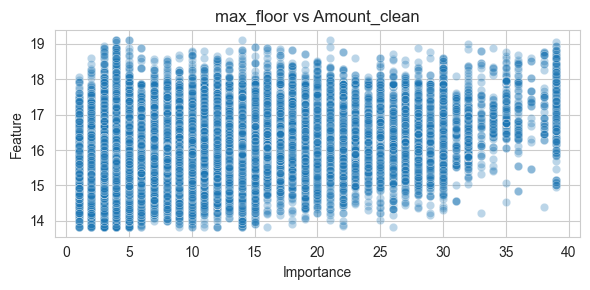

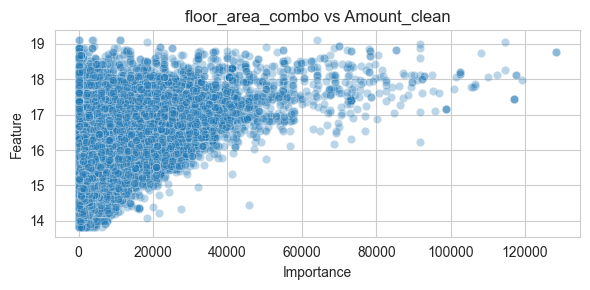

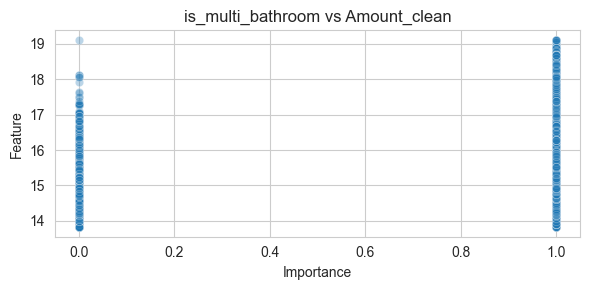

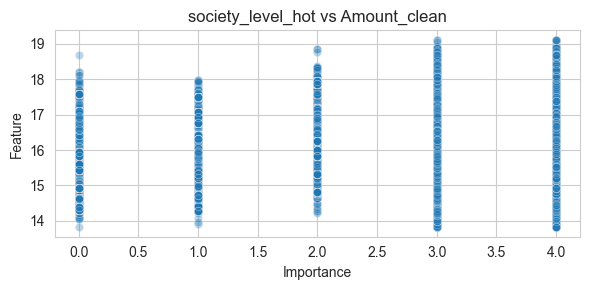

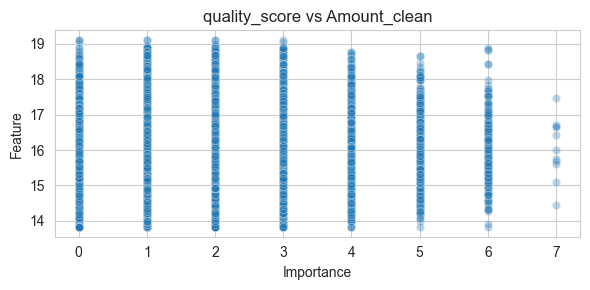

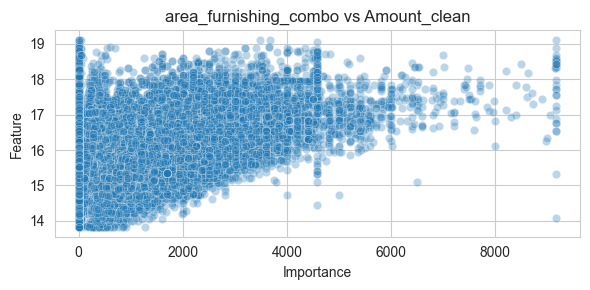

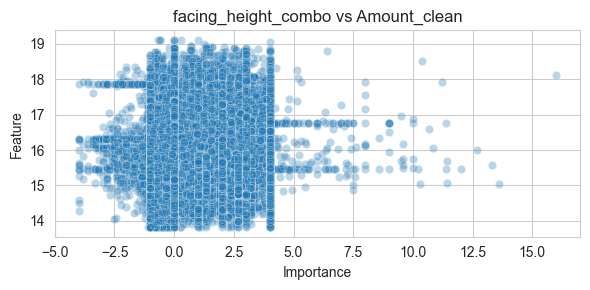

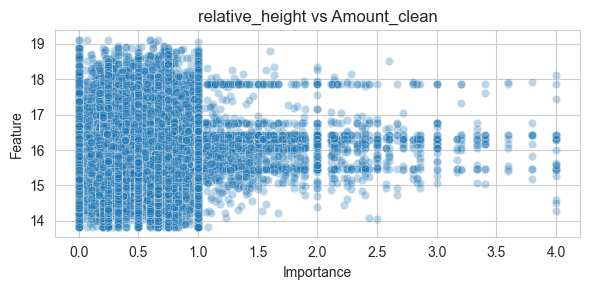

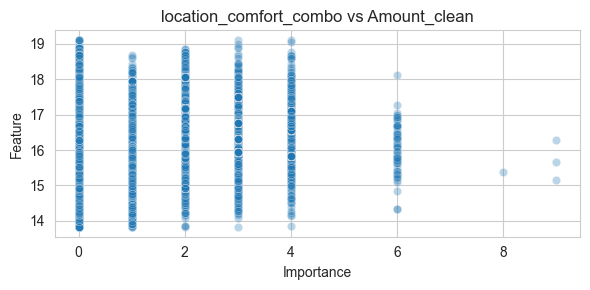

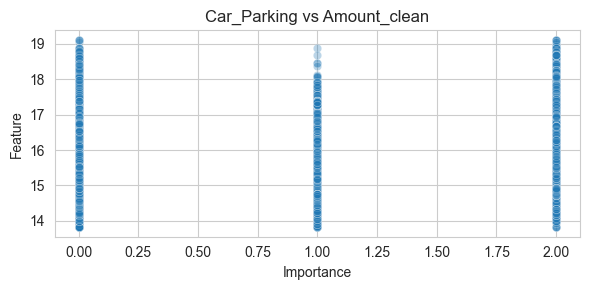

In [9]:
#ÁâπÂæÅÂêëÈáèÁõ∏ÂÖ≥ÊÄß + Ëá™Âä®ÂâîÈô§È´òÁõ∏ÂÖ≥
print("step2---ÁâπÂæÅÂêëÈáèÁõ∏ÂÖ≥ÊÄß") 
advanced_feature = plot_feature_correlation(df_cleaned_features, features = top_features, threshold=0.8)
#VIFÊ£ÄÈ™å + Ëá™Âä®ÂâîÈô§È´òÂ∫¶VIF
print("step3---VIFÊ£ÄÈ™å")
advanced_features_ultimate = check_multicollinearity(df_cleaned_features, features=advanced_feature,threshold=8)
#ÁâπÂæÅÂÄºÈáçË¶ÅÊÄßÊéíÂ∫è
print("step4---ÁâπÂæÅÂÄºÈáçË¶ÅÊÄßÊéíÂ∫è")
deep_analysis = FeatureDeepAnalysis(df_cleaned,features=advanced_features_ultimate,model_cls=RandomForestRegressor,target_col="Amount_clean")
deep_analysis.plot_feature_importance()
#ÁâπÂæÅÂÄºÁîªÂõæ
print("step5---ÁâπÂæÅÂÄºÁîªÂõæ")
deep_analysis.plot_feature_distribution()
#ÁâπÂæÅÂÄºÂíåÁõÆÊ†áÂèòÈáèÁöÑÁõ∏ÂÖ≥ÊÄß
print("step6---ÁâπÂæÅÂÄºÂíåÁõÆÊ†áÂèòÈáèÁöÑÁõ∏ÂÖ≥ÊÄß")
deep_analysis.plot_feature_vs_target()

Train Model 

In [10]:
after_trained_model, X_test, y_test = train_model(df_cleaned_features, df_cleaned, features_to_use = advanced_features_ultimate, model_cls = RandomForestRegressor) 

‚úÖ Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàêÔºå‰øùÂ≠òÂà∞Ôºö models_saved/rf_model.pkl


Evaulate Model & Parameter optimization

In [11]:
#ÁÆÄÂçïËØÑ‰º∞
evaluate_model(after_trained_model, X_test, y_test)



MAE: 0.10
RMSE: 0.21
R¬≤ Score: 0.9319


{'MAE': 0.09597240087339792,
 'RMSE': 0.21173463233816844,
 'R2': 0.9318674169704209}

In [12]:

#‰∫§ÂèâÊ£ÄÈ™åÁ®≥ÂÆöÊÄß

In [13]:
df_cross_evaulation = enhanced_cross_validate(model = RandomForestRegressor(),
                                               features = df_cleaned[advanced_features_ultimate], 
                                               target_col=df_cleaned["Amount_clean"].values, 
                                               return_df=True)
print("‰∫§ÂèâÊ£ÄÈ™åÁªìÊûúÂ¶Ç‰∏ã:",df_cross_evaulation)

üìä 5-Êäò‰∫§ÂèâÈ™åËØÅÁªìÊûú:
üîπ MAE : 0.0950 ¬± 0.0006
üîπ MSE : 0.0439 ¬± 0.0009
üîπ R2  : 0.9338 ¬± 0.0014
‰∫§ÂèâÊ£ÄÈ™åÁªìÊûúÂ¶Ç‰∏ã:     fit_time  score_time  test_MAE  test_MSE   test_R2
0  74.501927    0.727675 -0.095616 -0.044540  0.932310
1  75.442132    0.709952 -0.095609 -0.044786  0.932518
2  76.391955    0.803034 -0.094918 -0.043181  0.934751
3  76.821075    0.831986 -0.094312 -0.043975  0.933905
4  77.034380    0.774982 -0.094722 -0.042777  0.935388


grid_search (ËøõË°åÁΩëÊ†ºÂåñË∞ÉÂèÇ)